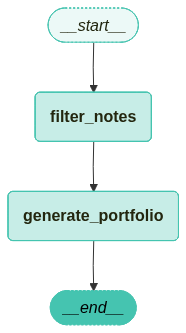

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from app.agents.portfolio.graph import portfolio_graph
from langchain_teddynote.graphs import visualize_graph

visualize_graph(portfolio_graph, xray=True)

In [2]:
from app.core.log import langfuse_handler
# 테스트용 더미 데이터
dummy_input = {
    "project_title": "ProjecTree - 프로젝트 관리 및 추천 시스템",
    "project_description": "LLM 기반 프로젝트 태스크 자동 생성 및 기술 스택 추천 서비스. 사용자가 프로젝트 아이디어를 입력하면 AI가 Epic-Story-Task 구조로 분해하고, 각 태스크에 적합한 기술 스택을 추천합니다.",
    "project_start_date": "2026-01-15",
    "project_end_date": "2026-02-15",
    "project_tech_stack": [
        "Python", "FastAPI", "LangChain", "LangGraph", "PostgreSQL", "React", "TypeScript"
    ],
    "project_head_count": 6,
    "user_tasks": [
        {
            "task_name": "JWT 인증 시스템 구현",
            "task_description": "Spring Security와 JWT를 활용한 사용자 인증/인가 시스템 개발",
            "task_note": "처음에 세션 기반 인증을 고려했으나, MSA 환경에서의 확장성과 모바일 클라이언트 지원을 고려하여 JWT를 선택함. Access Token 만료 시간은 15분, Refresh Token은 7일로 설정",
            "comparison": "Session vs JWT: MSA 환경에서의 확장성과 모바일 클라이언트 지원을 고려하여 서버 상태 저장이 필요 없는 JWT를 선택함.",
            "tech_stack": {
                "name": "JWT",
                "advantage": "무상태 인증으로 서버 확장성 우수",
                "disadvantage": "토큰 탈취 시 만료 전까지 사용 가능",
                "description": "JSON Web Token 기반 인증"
            }
        },
        {
            "task_name": "LangGraph 기반 추천 파이프라인 개발",
            "task_description": "기술 스택 추천을 위한 멀티 에이전트 워크플로우 구현",
            "task_note": "LangChain의 단순 체인 구조로는 복잡한 분기 처리가 어려워 LangGraph를 도입. FE/BE/Infra 전문가 에이전트를 병렬로 실행하고 결과를 통합하는 구조로 설계",
            "comparison": "LangChain Chain vs LangGraph: 단순 체인으로는 복잡한 분기 처리와 순환 루프 구현이 어려워, 상태 관리가 가능한 LangGraph를 도입함.",
            "tech_stack": {
                "name": "LangGraph",
                "advantage": "복잡한 워크플로우를 그래프 구조로 표현 가능",
                "disadvantage": "학습 곡선이 있음",
                "description": "LLM 애플리케이션용 워크플로우 프레임워크"
            }
        },
        {
            "task_name": "PostgreSQL 스키마 설계",
            "task_description": "프로젝트, 노드, 후보, 기술스택 테이블 설계 및 관계 정의",
            "task_note": "오늘 회의에서 ERD 검토함. 김팀장님이 몇가지 피드백 주셨음.",
            "tech_stack": {
                "name": "PostgreSQL",
                "advantage": "ACID 트랜잭션, JSON 지원",
                "disadvantage": "NoSQL 대비 스키마 변경이 어려움",
                "description": "오픈소스 관계형 데이터베이스"
            }
        },
        {
            "task_name": "CRDT 기반 실시간 동기화 구현",
            "task_description": "여러 사용자가 동시에 프로젝트를 편집할 때 충돌 없이 동기화되는 시스템 구현",
            "task_note": "Operational Transform 대신 CRDT를 선택한 이유: 1) 서버 없이도 P2P 동기화 가능, 2) 네트워크 파티션 상황에서도 eventual consistency 보장, 3) Yjs 라이브러리가 성숙하고 문서화가 잘 되어 있음",
            "comparison": "Operational Transform vs CRDT: 중앙 서버 없이 P2P 동기화가 가능하고, 네트워크 파티션 상황에서도 결과적 일관성(Eventual Consistency)을 보장하는 CRDT 방식을 선택함.",
            "tech_stack": {
                "name": "Yjs",
                "advantage": "성숙한 CRDT 구현, 다양한 바인딩 제공",
                "disadvantage": "메모리 사용량이 높을 수 있음",
                "description": "CRDT 기반 실시간 협업 프레임워크"
            }
        },
        {
            "task_name": "React 컴포넌트 개발",
            "task_description": "프로젝트 트리 뷰 및 노드 편집 UI 컴포넌트 개발",
            "task_note": "내일까지 완료해야 함. 힘들다...",
            "tech_stack": {
                "name": "React",
                "advantage": "컴포넌트 기반 UI 개발",
                "disadvantage": "상태 관리 복잡성",
                "description": "JavaScript UI 라이브러리"
            }
        },
        { 
             "task_name": "DB 연결 타임아웃 해결",
             "task_description": "대량 트래픽 발생 시 DB 연결이 끊기는 문제 해결",
             "task_note": "커넥션 풀 설정을 HikariCP로 변경하고 maxLifetime을 DB wait_timeout보다 짧게 설정하여 해결함. 또한 커넥션 누수 방지를 위해 leakDetectionThreshold 설정 추가.",
             "tech_stack": {
                 "name": "HikariCP",
                 "advantage": "빠르고 가벼운 JDBC 커넥션 풀",
                 "disadvantage": "설정이 복잡할 수 있음",
                 "description": "High-performance JDBC connection pool"
             }
        }
    ],
    "retry_count": 1 
}

# 그래프 실행
result = await portfolio_graph.ainvoke(dummy_input, config={"callbacks": [langfuse_handler]})

# 결과 출력
print("=== 포트폴리오 생성 결과 ===")
print(result.get("portfolio_content", "포트폴리오 생성 실패"))

=== 포트폴리오 생성 결과 ===
# ProjecTree - 프로젝트 관리 및 추천 시스템

## 📌 프로젝트 개요
- **기간**: 2026-01-15 ~ 2026-02-15
- **팀 구성**: 6명
- **한 줄 소개**: 아이디어를 입력하면 LLM으로 Epic-Story-Task 구조로 분해하고, 각 태스크에 적합한 기술 스택을 추천하는 엔드투엔드 솔루션. Python/FastAPI 기반의 AI 워크플로우와 React UI로 협업과 프로젝트 기획 속도를 대폭 향상시킵니다.

## 🛠 사용 기술 스택
| 구분 | 기술 | 선정 이유 |
|------|------|----------|
| Backend | Python, FastAPI, LangGraph, PostgreSQL | 고성능 API 서버와 LLM 기반 워크플로우를 구성하고, 확장 가능한 데이터 저장소를 제공하기 위함. LangGraph로 복잡한 상태 관리 및 다에이전트 협업 파이프라인 구현 가능. PostgreSQL으로 데이터 무결성과 관계형 모델링을 지원. |
| Frontend | React, TypeScript | 강력한 UI 구성과 타입 안정성으로 사용자 경험을 높이고, 프로젝트 트리 뷰 편집 UI를 효과적으로 구현. |
| Infra | Docker, (K8s 추후) | 컨테이너화로 배포 안정성과 환경 일관성 확보. 확장 시 K8s 도입 가능. |
| 실시간 협업 | Yjs | CRDT 기반 실시간 동기화를 통해 다수 사용자의 병렬 편집에서도 충돌 최소화. |
| DB 커넥션 관리 | HikariCP | 대량 트래픽에서의 안정적인 커넥션 풀과 누수 방지 설정으로 DB 연결 이슈 최소화. |

## 💡 담당 역할 및 기여
### 주요 기여 요약
- **역할**: Backend 및 인프라 엔지니어링 중심으로, 인증/권한 시스템, 실시간 협업 파이프라인, 데이터 모델 설계와 DB 성능 개선에 집중
- **기여도**: Backend 작업 33.3%, Frontend 연계 16.7%, 데이터/협